In [1]:
import pandas as pd
from datetime import datetime
import pm4py
import numpy as np
#from scipy.stats import mannwhitneyu
#import collections
#from statistics import mean
#from statistics import median
from collections import defaultdict
from Levenshtein import distance

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
#from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

import copy

In [ ]:
#logVar.to_csv('logVar_Evaluation_PO.csv', index = False)

In [4]:
logVar = pd.read_csv('logVar_Evaluation_PO.csv')

In [5]:
logVar

,index,case:concept:name,activity,type
0,2573,DF14507029708_00001,"[14, 19, 19, 19, 21, 21, 21, 19, 19, 19, 19, 1...",DF1
1,4575,DF14508063229_00001,"[14, 19, 19, 21, 21, 41, 20, 13]",DF1
2,3160,DF14507039608_00001,"[14, 19, 19, 21, 21, 19, 19, 19, 19, 19, 19, 1...",DF1
3,1869,DF14507018444_00001,"[14, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...",DF1
4,4417,DF14508060682_00001,"[14, 19, 19, 21, 21, 41, 20, 13]",DF1
...,...,...,...,...
349,21634,DF44508060051_00020,"[15, 14, 19, 19, 19, 19, 9, 19]",DF4
350,21635,DF44508068545_00010,"[15, 14, 9, 9, 18, 9, 9, 19]",DF4
351,21636,DF44508069068_00010,"[15, 14, 9, 9, 18, 9, 19, 6]",DF4
352,21637,DF44508073350_00030,"[15, 14, 9, 19, 19, 19, 19, 19, 19, 19]",DF4


### Levenshtein Distance

In [16]:
import ast

#Calculate Levenshtein Distances
logVar["activity"] = logVar["activity"].apply(lambda x: ast.literal_eval(x))
logVar["c:n_chr"] = logVar["activity"].apply(lambda x: [chr(int(i)) for i in x])
logVar["strings"] = logVar["c:n_chr"].apply(lambda x: ''.join(x))
logVar

,index,case:concept:name,activity,type,c:n_chr,strings
0,2573,DF14507029708_00001,"[14, 19, 19, 19, 21, 21, 21, 19, 19, 19, 19, 1...",DF1,"[, , , , , , , , , , , , , , , ...",...
1,4575,DF14508063229_00001,"[14, 19, 19, 21, 21, 41, 20, 13]",DF1,"[, , , , , ), , \r]",)\r
2,3160,DF14507039608_00001,"[14, 19, 19, 21, 21, 19, 19, 19, 19, 19, 19, 1...",DF1,"[, , , , , , , , , , , , , , , ...",...
3,1869,DF14507018444_00001,"[14, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...",DF1,"[, , , , , , , , , , , , , , , ...",...
4,4417,DF14508060682_00001,"[14, 19, 19, 21, 21, 41, 20, 13]",DF1,"[, , , , , ), , \r]",)\r
...,...,...,...,...,...,...
349,21634,DF44508060051_00020,"[15, 14, 19, 19, 19, 19, 9, 19]",DF4,"[, , , , , , \t, ]",\t
350,21635,DF44508068545_00010,"[15, 14, 9, 9, 18, 9, 9, 19]",DF4,"[, , \t, \t, , \t, \t, ]",\t\t\t\t
351,21636,DF44508069068_00010,"[15, 14, 9, 9, 18, 9, 19, 6]",DF4,"[, , \t, \t, , \t, , ]",\t\t\t
352,21637,DF44508073350_00030,"[15, 14, 9, 19, 19, 19, 19, 19, 19, 19]",DF4,"[, , \t, , , , , , , ]",\t


In [17]:
#Levenshtein Distance
from Levenshtein import distance

List = list(logVar["strings"])

dist_matrix = np.zeros((len(List),len(List)),dtype=int)

for i in range(0,len(List)):
    for j in range(0,len(List)):
        dist_matrix[i,j] = distance(List[i],List[j])

Matrix = dist_matrix
Matrix

array([[  0, 235,  89, ..., 242, 236, 242],
       [235,   0, 283, ...,   8,   7,   8],
       [ 89, 283,   0, ..., 290, 284, 290],
       ...,
       [242,   8, 290, ...,   0,   6,   0],
       [236,   7, 284, ...,   6,   0,   6],
       [242,   8, 290, ...,   0,   6,   0]])

In [18]:
#Calculate linkage Matrix
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt


linkage_matrix = linkage(Matrix, "single")
linkage_matrix

C:\Users\la1949\AppData\Local\Temp\ipykernel_24040\3322759967.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(Matrix, "single")


array([[ 115.        ,  168.        ,    0.        ,    2.        ],
       [  25.        ,  122.        ,    0.        ,    2.        ],
       [ 138.        ,  355.        ,    0.        ,    3.        ],
       ...,
       [ 702.        ,  703.        ,  874.24710466,   12.        ],
       [  70.        ,  704.        ,  959.97239544,   13.        ],
       [ 699.        ,  705.        , 1067.73404928,  354.        ]])

In [19]:
#Calculate overall Variety based on Minimum Spanning Tree

def mst(linkage_matrix):
    x = 0
    for i in linkage_matrix:
        x += i[2]
    return x

logVariety = mst(linkage_matrix)
logVariety

12546.265713044228

In [21]:
#Distances after clustering
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import squareform

cophenet_matrix = squareform(cophenet(linkage_matrix))
cophenet_matrix

array([[   0.        , 1067.73404928,  406.26469204, ..., 1067.73404928,
        1067.73404928, 1067.73404928],
       [1067.73404928,    0.        , 1067.73404928, ...,   20.59126028,
          20.59126028,   20.59126028],
       [ 406.26469204, 1067.73404928,    0.        , ..., 1067.73404928,
        1067.73404928, 1067.73404928],
       ...,
       [1067.73404928,   20.59126028, 1067.73404928, ...,    0.        ,
          18.24828759,    0.        ],
       [1067.73404928,   20.59126028, 1067.73404928, ...,   18.24828759,
           0.        ,   18.24828759],
       [1067.73404928,   20.59126028, 1067.73404928, ...,    0.        ,
          18.24828759,    0.        ]])

In [22]:
#Derive ordering of traces based on their marginal distance

def marginal_variety(pairwise_distances):
    # Create a copy of the pairwise distance matrix
    modified_distances = pairwise_distances.astype(float)
    traceOrder = []
    margVariety = []
    
    
    # Set diagonal elements to NaN
    np.fill_diagonal(modified_distances, np.nan)
    
    # Iterate to remove the desired number of minimum values
    for i in range(len(pairwise_distances)-1):
        # Find the minimum value and its indices
        min_val = np.nanmin(modified_distances)  # Use np.nanmin to ignore NaN values
        min_indices = np.argwhere(modified_distances == min_val)
        
        # Get the row and column indices to replace by NaN
        row_idx, col_idx = min_indices[0][0], min_indices[0][0]
        
        #Get order of traces + their marginal contribution to variety
        traceOrder.append(row_idx)
        margVariety.append(min_val)
        
        
        # Change values in the row and column corresponding to the minimum value to NaN
        modified_distances[row_idx, :] = np.nan
        modified_distances[:, col_idx] = np.nan
        
    #return modified_distances
    return traceOrder, margVariety #modified_distances



order, margVar = marginal_variety(cophenet_matrix)
margVar

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.196152422706632,
 5.291502622129181,
 5.385164807134504,
 5.385164807134504,
 6.164414002968976,
 6.324555320336759,
 7.416198487095663,
 7.874007874011811,
 8.0,
 8.888194417315589,
 9.0,
 9.16515138991168,
 9.327379053088816,
 9.327379053088816,
 9.486832980505138,
 9.486832980505138,
 9.591663046625438,
 9.591663046625438,
 10.099504938362077,
 10.14889156509222,
 10.246950765959598,
 10.344080432788601,
 10.44030650891055,
 10.535653752852738,
 10.63014581273465,
 10.677078252031311,
 10.816653826391969,
 10.862780491200215,
 10.954451150103322,
 10.954451150103322,
 10.954451150103322,
 11.180339887498949,
 11.26942766958464

In [23]:
#Optimal Alignment based on Needleman-Wunsch Algorithm
# See: https://gist.github.com/slowkow/06c6dba9180d013dfd82bec217d22eb5


def nw(x, y, match = 0, mismatch = 1, gap = 1):
    nx = len(x)
    ny = len(y)
    # Optimal score at each possible pair of characters.
    F = np.zeros((nx + 1, ny + 1))
    F[:,0] = np.linspace(0, -nx * gap, nx + 1)
    F[0,:] = np.linspace(0, -ny * gap, ny + 1)
    # Pointers to trace through an optimal aligment.
    P = np.zeros((nx + 1, ny + 1))
    P[:,0] = 3
    P[0,:] = 4
    # Temporary scores.
    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            tmax = np.max(t)
            F[i+1,j+1] = tmax
            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4
    # Trace through an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            rx.append(x[i-1])
            ry.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            rx.append(x[i-1])
            ry.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j-1])
            j -= 1
    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]
    #print(F)
    return F[-1][-1]
    #return '\n'.join([rx, ry])

#x = "PCGUTTV"
#y = "PCGUTTW"
#nw(x, y)

In [26]:
def alignMatrix(list_of_strings):
    n = len(list_of_strings)
    dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

    for i in range(n):
        for j in range(i, n):
            dist_matrix[i,j] = nw(list_of_strings[i], list_of_strings[j])
            dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
            
    return dist_matrix


listVec = logVar["strings"]
Matrix_Align = alignMatrix(listVec)
Matrix_Align

array([[   0., -235.,  -89., ..., -242., -236., -242.],
       [-235.,    0., -283., ...,   -8.,   -7.,   -8.],
       [ -89., -283.,    0., ..., -290., -284., -290.],
       ...,
       [-242.,   -8., -290., ...,    0.,   -6.,    0.],
       [-236.,   -7., -284., ...,   -6.,    0.,   -6.],
       [-242.,   -8., -290., ...,    0.,   -6.,    0.]])

In [27]:
#Create ordered list of Alignment costs

def marginal_alignments(pairwise_distances, order):
    # Create a copy of the pairwise distance matrix
    modified_distances = pairwise_distances.astype(float)
    #traceOrder = []
    margAlignments = []
    
    
    # Set diagonal elements to NaN
    np.fill_diagonal(modified_distances, np.nan)
    
    # Iterate to remove the desired number of minimum values
    #for i in range(len(pairwise_distances)-1):
    for i in order:
        # Find the minimum value and its indices
        min_val = np.nanmin(modified_distances[i])  # Use np.nanmin to ignore NaN values
        #min_indices = np.argwhere(modified_distances == min_val)
        
        # Get the row and column indices to replace by NaN
        #row_idx, col_idx = min_indices[0][0], min_indices[0][0]
        
        #Get order of traces + their marginal contribution to variety
        #traceOrder.append(row_idx)
        margAlignments.append(-min_val)
        
        
        # Change values in the row and column corresponding to the minimum value to NaN
        modified_distances[i, :] = np.nan
        modified_distances[:, i] = np.nan
        
    #return modified_distances
    return margAlignments #modified_distances



margAlignCosts = marginal_alignments(Matrix_Align, order)
margAlignCosts

[332.0,
 335.0,
 329.0,
 328.0,
 329.0,
 336.0,
 336.0,
 335.0,
 336.0,
 335.0,
 336.0,
 335.0,
 336.0,
 336.0,
 330.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 329.0,
 327.0,
 329.0,
 329.0,
 327.0,
 329.0,
 327.0,
 330.0,
 330.0,
 336.0,
 336.0,
 337.0,
 329.0,
 330.0,
 337.0,
 337.0,
 335.0,
 336.0,
 328.0,
 330.0,
 330.0,
 335.0,
 335.0,
 334.0,
 331.0,
 329.0,
 334.0,
 337.0,
 331.0,
 330.0,
 337.0,
 329.0,
 335.0,
 334.0,
 329.0,
 330.0,
 335.0,
 336.0,
 334.0,
 331.0,
 330.0,
 336.0,
 332.0,
 335.0,
 335.0,
 336.0,
 337.0,
 336.0,
 336.0,
 337.0,
 337.0,
 331.0,
 337.0,
 336.0,
 334.0,
 337.0,
 332.0,
 321.0,
 334.0,
 337.0,
 334.0,
 332.0,
 335.0,
 335.0,
 332.0,
 335.0,
 335.0,
 335.0,
 337.0,
 337.0,
 337.0,
 337.0,
 337.0,
 333.0,
 337.0,


In [28]:
#Calculate increase in alignment costs
def alignIncrease(margAlignCosts):
    inAlign = [0]
    newAlign = 0
    for i in margAlignCosts:
        newAlign += i
        inAlign.append(newAlign)
    return inAlign

alignCostIncrease = alignIncrease(margAlignCosts)

In [33]:
#Calculate decrease in variety
def varDecrease(var, margVar):
    deVar = [var]
    newVar = var
    for i in margVar:
        newVar -= i
        deVar.append(newVar)
    return deVar

varietyDecrease = varDecrease(logVariety, margVar)

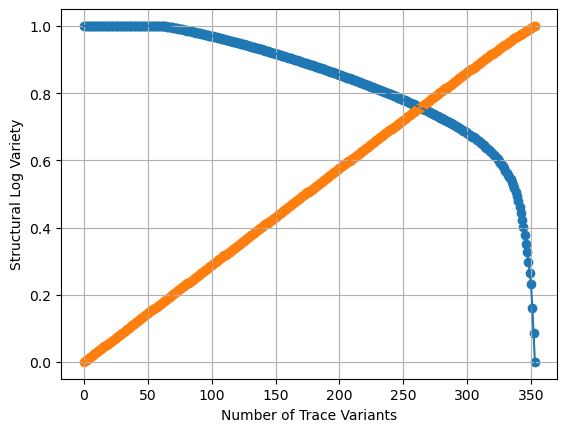

In [34]:
#import matplotlib as mlp
import matplotlib.pyplot as plt

# Label für die y-Achse vergeben:
plt.ylabel('Structural Log Variety')
plt.xlabel('Number of Trace Variants')


x = list(range(0, len(cophenet_matrix)))
y = varietyDecrease
y = y / max(y) #normalization

y2 = alignCostIncrease
y2 = y2 / max(y2) #normalization

# Einen x-y-Plot erstellen:
plt.plot(x, y)
plt.plot(x, y2)

# plot scatter plot with x and y data 
plt.scatter(x, y)
plt.scatter(x, y2)

# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
#plt.axis([0, 5, 0, 20])

# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)

# Diagramm anzeigen:
plt.show()

### Normalized Levenshtein Distance

In [71]:
List = logVar["strings"]

n = len(List)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = distance(List[i], List[j]) / max(len(List[i]),len(List[j]))
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation

lev_dis_norm = dist_matrix

In [72]:
Matrix = lev_dis_norm

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8832407407407407
P@10: 0.8573703703703704
Tri:  tensor(0.8424)
Sil:  0.32994231921513734


### Euclidean based on 1-gram

In [73]:
#Create 1-gram

def createVector(charList):
    #dtype = [('structure', 'S10'), ('relfrequ', float)]
    arrayList = np.array(charList)
    unique, counts = np.unique(arrayList, return_counts=True)
    #calculate relative frequency
    relFrequList = np.array((unique, counts)).T
    uniqueList = list(unique)
    return relFrequList[relFrequList[:, 0].argsort()]
    #check completeness
    #if 'tree' not in uniqueList:
        #relFrequList = np.append(relFrequList, np.array([['tree', 0]]), axis=0)
        #print(relFrequList)

        
#Change data format from string to list of unique characters
logVar["1-gram"] = logVar["c:n_chr"].apply(lambda x: createVector(tuple(x)))
#logVar


In [74]:
# Euclidean distance Normalized 1-gram
# see https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy

def alignArrays(array1, array2):
    commonSet = set(array1[:,0]).union(array2[:,0])
    
    for i in commonSet:
        if i not in array1[:,0]:
            array1 = np.append(array1, np.array([[i, '0']]), axis=0)
        if i not in array2[:,0]:
            array2 = np.append(array2, np.array([[i, '0']]), axis=0)
    return array1[array1[:, 0].argsort()], array2[array2[:, 0].argsort()]


def euclidDist(frequVector1, frequVector2):
    Vector1, Vector2 = alignArrays(frequVector1, frequVector2)
    a = Vector1[:,1].astype(float)
    b = Vector2[:,1].astype(float)
    euclidean_dist = np.linalg.norm(a-b)
    return euclidean_dist

In [75]:
#Calculate euclidean distance

listVec = logVar["1-gram"]

n = len(listVec)
dist_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = euclidDist(listVec[i], listVec[j])
        dist_matrix[j,i] = dist_matrix[i,j]  
        
euc1_dis = dist_matrix

In [76]:
Matrix = euc1_dis

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8528703703703704
P@10: 0.8602962962962962
Tri:  tensor(0.7982)
Sil:  0.12703945774016842


### Euclidean based on 2-gram

In [77]:
#Change data format from string to list of unique characters
#logVar["charList"] = logVar["trace_variant"].apply(lambda x: list(x))
#logVar

def df_list(list_of_char):
    extList = list_of_char.copy()
    extList.insert(0, '*') 
    extList.append('$')
    list_new = []
    for i in range(len(extList)):
        new = ''.join(extList[i:i+2])
        list_new.append(new)
    del list_new[-1]
    return list_new

#Change data format from string to list of unique characters
logVar["dfList"] = logVar["c:n_chr"].apply(lambda x: df_list(x))
#logVar

In [78]:
logVar["2-gram"] = logVar["dfList"].apply(lambda x: createVector(x))
#logVar

listVec = logVar["2-gram"]

n = len(listVec)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        #print(listVec[i], listVec[j])
        dist_matrix[i,j] = euclidDist(listVec[i], listVec[j])
        #print(dist_matrix[i,j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation


euc2_dis = dist_matrix

In [79]:
Matrix = euc2_dis

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8961111111111111
P@10: 0.8535648148148148
Tri:  tensor(0.7519)
Sil:  0.00807957753275518


### Cosine based on 1-gram

In [80]:
#One-hot embedding

def alignArrays_OneHotEmbedding(array1, array2):
    
    for i in range(len(array1)):
        if int(array1[:,1][i]) > 1:
            array1[:,1][i] = 1
    
    for i in range(len(array2)):
        if int(array2[:,1][i]) > 1:
            array2[:,1][i] = 1
               
    commonSet = set(array1[:,0]).union(array2[:,0])
    #print(commonSet)
        
    for i in commonSet:
        if i not in array1[:,0]:
            array1 = np.append(array1, np.array([[i, '0']]), axis=0)
        if i not in array2[:,0]:
            array2 = np.append(array2, np.array([[i, '0']]), axis=0)
    return array1[array1[:, 0].argsort()], array2[array2[:, 0].argsort()]


In [81]:
from scipy.spatial import distance

def cosineDist(frequVector1, frequVector2):
    Vector1, Vector2 = alignArrays_OneHotEmbedding(frequVector1, frequVector2)
    a = Vector1[:,1].astype(int)
    b = Vector2[:,1].astype(int)
    dist_matrix = distance.cosine(a, b)
    return dist_matrix

In [82]:
#Cosine distance based on 1-gram

listVec = logVar["1-gram"]

n = len(listVec)
dist_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = cosineDist(listVec[i], listVec[j])
        dist_matrix[j,i] = dist_matrix[i,j]  
        
cos1_dis = dist_matrix

In [83]:
Matrix = cos1_dis

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8286111111111112
P@10: 0.859574074074074
Tri:  tensor(0.8503)
Sil:  0.3487624666164617


### Cosine based on 2-gram

In [84]:
#Cosine distance based on 2-gram

listVec = logVar["2-gram"]

n = len(listVec)
dist_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = cosineDist(listVec[i], listVec[j])
        dist_matrix[j,i] = dist_matrix[i,j]  
        
cos2_dis = dist_matrix

In [85]:
Matrix = cos2_dis

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8664814814814815
P@10: 0.8740185185185185
Tri:  tensor(0.8487)
Sil:  0.326007218136964


### Jaccard based on 1-gram

In [86]:
#Distance based on activity type

def jaccard_similarity(list1, list2):
    s1, s2 = set(list1), set(list2)
    return 1 - len(s1 & s2) / len(s1 | s2)

In [87]:
ListChar = list(logVar["activity"])

n = len(ListChar)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = jaccard_similarity(ListChar[i], ListChar[j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
jacc_act = dist_matrix

In [88]:
Matrix = jacc_act

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8286111111111112
P@10: 0.859574074074074
Tri:  tensor(0.8471)
Sil:  0.3476682321100272


### Jaccard based on 2-gram

In [89]:
#Distance based on adjacency relations

#Create list of directly follow relations

def df_list(list_of_char):
    extList = list_of_char.copy()
    extList.insert(0, '*') 
    extList.append('$')
    list_new = []
    for i in range(len(extList)):
        new = ''.join(extList[i:i+2])
        list_new.append(new)
    del list_new[-1]
    return list_new

In [90]:
#Change data format from string to list of unique characters
logVar["dfList"] = logVar["c:n_chr"].apply(lambda x: df_list(x))
#logVar

In [91]:
ListChar = list(logVar["dfList"])

n = len(ListChar)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = jaccard_similarity(ListChar[i], ListChar[j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
dist_matrix_adj = dist_matrix

In [92]:
Matrix = dist_matrix_adj

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8689814814814815
P@10: 0.8755185185185186
Tri:  tensor(0.8490)
Sil:  0.28409672112169615


## Graph based measures

In [93]:
#Now consider edge types

In [94]:
# 1. transfer strings (string numbers) to integers --> HERE we need a new encoding!

#logVar = logVar.astype({"trace_variant": str}) #--> only needed if list values were transformed to int at one point

def intEncoder(character_List):
    return [np.where(np.array(list(dict.fromkeys(character_List)))==e)[0][0]for e in character_List]

logVar["intList"] = logVar["activity"].apply(lambda x: intEncoder(x))


# 2. transfer intList to int_tupleList

#Create tuple lists
def tuple_list(list_of_encodedActivities):
    #list.insert(0, '*')
    #list.append('*')
    list_new = []
    last_element = list_of_encodedActivities[-1]
    for i in range(len(list_of_encodedActivities)):
        new = tuple(list_of_encodedActivities[i:i+2])
        list_new.append(new)
    del list_new[-1]
    if list_of_encodedActivities.count(last_element) == 1: #check wether last activity in trace has some adjancency relation
        list_new.append((last_element,)) ### NOT Correct
    return list_new

#q = [0,0,0,0,1,1,2,3,4,5,3,2,4,0,5,6]
#tuple_list(q)

logVar["int_tupleList"] = logVar["intList"].apply(lambda x: tuple_list(x))
#logVar["int_tupleList"]

# 3. generate Adjacency List

def adj_list(list_of_tuples):
    adj_list_new = {}
    try:
        for node1, node2 in list_of_tuples:
            #print(node1, node2)
            if node1 not in adj_list_new:
                newlist = []
                newlist.append(node2)
                adj_list_new[node1] = newlist
                #print(adj_list3)
        
            else:
                if node2 not in adj_list_new[node1]:
                    #mylist.extend(adj_list3[node1])
                    adj_list_new[node1].append(node2)
                    #print(adj_list3)
                    #adj_list3[node1] = mylist
    
    #in case activity has no adjacent activity - only possible for last activity --> tuple: (lastAct,)
    except ValueError as ve:
        lastValue = list_of_tuples[-1][0] 
        adj_list_new[lastValue] = list()
    return list(adj_list_new.values())



logVar["int_adjList"] = logVar["int_tupleList"].apply(lambda x: adj_list(x))
#logVar["int_adjList"]




In [95]:
# 4. generate list of graph structure properties (apply depth first search + edge type identification)

#see: https://www.geeksforgeeks.org/tree-back-edge-and-cross-edges-in-dfs-of-graph/
#see also: https://stackoverflow.com/questions/73953915/classifying-edges-in-dfs-on-a-directed-graph


class Graph:
    # instance variables
    def __init__(self, graph_list2, indexList):
        # v is the number of nodes/vertices
        self.time = 0
        self.traversal_array = []
        self.structural_array = []
        self.graph_list = graph_list2
        self.v = len(graph_list2)
        self.indexList = indexList
        # e is the number of edge (randomly chosen between 9 to 45)
        #self.e = sum([len(listElem) for listElem in graph_list2])
        
    
    #function the get number of edges
    #def number_of_edges(self):
    #return sum([len(listElem) for listElem in self.graph_list])
 
    # function for dfs
    def dfs(self):
        #self.visited = [False]*self.v
        self.start_time = [-1]*self.v
        self.end_time = [-1]*self.v
 
        for node in range(self.v):
            if self.start_time[node] == -1:
                self.traverse_dfs(node)
                
        return self.structural_array
        #print()
        #print("DFS Traversal: ", self.traversal_array)
        #print()
 
    def traverse_dfs(self, node):
        # mark the node visited
        #self.visited[node] = True
        # add the node to traversal
        self.traversal_array.append(node)
        # get the starting time
        self.start_time[node] = self.time
        # increment the time by 1
        self.time += 1
        # traverse through the neighbours
        for neighbour in self.graph_list[node]:
            # when the neighbor was not yet visited
            if self.start_time[neighbour] == -1:
                #print(f"Tree Edge: {node}-->{neighbour}")
                #self.structural_array.append('NaN')
                #self.structural_array.append(str(self.indexList[node]))
                self.traverse_dfs(neighbour)
            # otherwise when the neighbour's visit is still ongoing:
            elif self.end_time[neighbour] == -1:
                #print(f"Back Edge: {node}-->{neighbour}")
                self.structural_array.append('back ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]))
            # otherwise when the neighbour's visit started before the current node's visit:
            elif self.start_time[node] < self.start_time[neighbour]:
                #print(f"Forward Edge: {node}-->{neighbour}")
                self.structural_array.append('forward ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]))
            else:
                #print(f"Cross Edge: {node}-->{neighbour}")
                self.structural_array.append('cross ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]))
        # Indentation corrected:
        self.end_time[node] = self.time
        self.time += 1 
        
#Create List for decoding traces
from collections import OrderedDict
logVar["indexList"] = logVar["activity"].apply(lambda x: list(OrderedDict.fromkeys(x)))

logVar["int_strucList"] = logVar.apply(lambda x: Graph(x.int_adjList, x.indexList).dfs(), axis =1)
#logVar

### Now Considering length of graph-features

In [ ]:
#Now consider also lengths

In [97]:
from collections import deque

def bfs_4(graph, start, end):
    
    graph = {v: k for v, k in enumerate(graph)}
    #print(start, end)
    queue = deque([(start, 0)])
    seen = set()
    while queue:
        #print(queue)
        node, distance = queue.popleft()
        #if not node:
            #print(start, end, queue)
            #print("GRAPH LIST", graph)
        if node in seen:
            continue
        seen.add(node)
        if node == end:
            return distance 
        for adjacent in graph.get(node, []):
            queue.append((adjacent, distance + 1))
        
#x = {0: [0, 1], 1: [2, 1, 0, int], 2:[2], [3: [1, 5, 3, 7], 4: [3], 5: [6, 5], 6: [1, 7], 7: [8, 9, 7], 8: [5, 8, 10], 9: [3]}
#y = [[0, 1, 5], [1, 2], [3, 4], [4, 2], [5, 0], [3, 6], []]
#bfs_4(y, 1, 6)

In [ ]:
#Now considering length of all constructs: loops + skips + cross

In [98]:
from collections import defaultdict, deque

def reverse_graph(graph):
    reversed_graph = defaultdict(list)
    for node in graph:
        for neighbor in graph[node]:
            reversed_graph[neighbor].append(node)
    return reversed_graph


def bfs_5(graph, start, end):
    queue = deque([(start, 0)])
    seen = set()
    visited = {}
    while queue:
        node, distance = queue.popleft()
        if node in seen:
            continue
        seen.add(node)
        if node == end: # maybe quicker if adjacent directly checked
            return visited
        for adjacent in graph.get(node, []):
            queue.append((adjacent, distance + 1))
            if adjacent not in visited:
                visited.update({adjacent:distance})

            
def common_ancestors(graph, node1, node2): 
    #remove cross type edge between node1 and node2
    graph[node1].remove(node2) #maybe issue, if graph is changed and not copy of graph?
    graph = {v: k for v, k in enumerate(graph)}
    graphReverse = reverse_graph(graph)
    setNode1 = bfs_5(graphReverse, node1, 0)
    setNode2 = bfs_5(graphReverse, node2, 0)
    if next((a for a in list(setNode1) if a in list(setNode2)), None) == None:
        firstCommonAnces = next((a for a in list(setNode2) if a in list(setNode1)), None)
    else:
        firstCommonAnces = next((a for a in list(setNode1) if a in list(setNode2)), 0)
    
    #uses a hash map to identify the first common ancestor in both lists
    #looks for the first common ancestor in setNode1, which can also be found in setNode2 
    #--> this might not be the closest distance between setNode1 and setNode2
    #--> e.g., for x= [0,1,3,7,5,6] and y= [4,5,7,8,3] 7 might be closest ancestor, although algo detects 3 !
    #distance = setNode1[firstCommonAnces] + setNode2[firstCommonAnces]
    
    
    if firstCommonAnces != None:   # ISSUE: in some cases the firstCommonAnces cannot be detected!
        ancesDistNode1 =  setNode1[firstCommonAnces] + 1 #the edge from node1 to first parent is counted as 0 by algorithm, therefore +1
        ancesDistNode2 =  setNode2[firstCommonAnces] + 1
        numberSkips = abs(ancesDistNode1 - ancesDistNode2)
        numberCross = min(ancesDistNode1, ancesDistNode2)
    else:
        numberSkips, numberCross = (0,1)
    return numberSkips, numberCross
    #if all(x in crossType for x in i):
    

    

#graphList = [[1], [2, 4, 1], [3, 2, 1], [], [5, 4], [5, 4, 6], [7], []]
#c = [[1, 4], [2], [3], [0, 5], [3, 5], []]
#c2 = {v: k for v, k in enumerate(c)}
#common_ancestors(c, 4, 5)
#reverse_graph(c2)

### Euclidean graph type + length

In [99]:
class Graph3:
    # instance variables
    def __init__(self, graph_list2, indexList):
        # v is the number of nodes/vertices
        self.time = 0
        self.traversal_array = []
        self.structural_array = [['tree', 0]]
        #self.structural_array = []
        self.graph_list = graph_list2
        self.v = len(graph_list2)
        self.indexList = indexList

    # function for dfs
    def dfs(self):
        self.start_time = [-1]*self.v
        self.end_time = [-1]*self.v
 
        for node in range(self.v):
            if self.start_time[node] == -1:
                self.traverse_dfs(node)
                
        return np.array(self.structural_array)
        #print()
        #print("DFS Traversal: ", self.traversal_array)
        #print()
 
    def traverse_dfs(self, node):
        self.traversal_array.append(node)
        # get the starting time
        self.start_time[node] = self.time
        self.time += 1
        # traverse through the neighbours
        for neighbour in self.graph_list[node]:

            # when the neighbor was not yet visited
            if self.start_time[neighbour] == -1:                
                self.structural_array[0][1] += 0
                self.traverse_dfs(neighbour)
                
            # otherwise when the neighbour's visit is still ongoing:
            elif self.end_time[neighbour] == -1:
                if node == neighbour:
                    self.structural_array.append(['1back ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),1])
                    #self.structural_array.append([str(1)+'b'])
                
                elif node in self.graph_list[neighbour]:
                    self.structural_array.append(['2back ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),2])
                    #self.structural_array.append(str(2)+'b')
                    
                else:
                    x = bfs_4(self.graph_list, neighbour, node)
                    self.structural_array.append([str(x+1)+'back ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),x+1])
                    #self.structural_array.append(str(x+1)+'b')
                
            # otherwise when the neighbour's visit started before the current node's visit:
            elif self.start_time[node] < self.start_time[neighbour]:
                graph_list_copy = copy.deepcopy(self.graph_list)
                graph_list_copy[node].remove(neighbour)
                y = bfs_4(graph_list_copy, node, neighbour)
                self.structural_array.append([str(y-1)+'forward ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),y-1])
                #self.structural_array.append(['forward ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),y-1])
                #self.structural_array.extend((y-1)*['forward']) # -1 to exclude one edge: (A:B,C;B:C;C:[]) ...the dist A --> C is 2 without forward edge, but we are skipping only one activity
                #self.structural_array.append(str(y-1)+'f')
                
            else:
                #Possibly first check, whether two nodes connected by cross-type have identical parent
                numberSkips, numberCross = common_ancestors(self.graph_list, node, neighbour)
                self.structural_array.append([str(numberCross)+'cross ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),numberCross])
                #self.structural_array.append(['forward ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),numberSkips])
                #self.structural_array.append(['cross ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),numberCross])
                #self.structural_array.append(str(numberSkips)+'f')
                #self.structural_array.append(str(numberCross)+'c')
    
        # Indentation corrected:
        self.end_time[node] = self.time
        self.time += 1



#c = [[1, 4], [2], [3], [0, 5], [3], []]
#g = Graph2(c)
#g.dfs()

In [100]:
logVar["int_strucLengthList3"] = logVar.apply(lambda x: Graph3(x.int_adjList, x.indexList).dfs(), axis =1)
#logVar["relFrequVec3"] = logVar["int_strucLengthList3"].apply(lambda x: createVector(x))
#logVar

logVar["relFrequVec3"] = logVar["int_strucLengthList3"].apply(lambda x: pd.DataFrame(x, columns=['String', 'Value']))
logVar["relFrequVec3"] = logVar["relFrequVec3"].apply(lambda x: x.groupby('String', as_index=False)['Value'].sum())
logVar["relFrequVec3"] = logVar["relFrequVec3"].apply(lambda x: x.to_numpy())
logVar["relFrequVec3"]

0      [[1back 19 19, 1], [1back 21 21, 1], [2back 21...
1        [[1back 19 19, 1], [1back 21 21, 1], [tree, 0]]
2      [[1back 19 19, 1], [1back 21 21, 1], [2back 21...
3      [[1back 19 19, 1], [1back 21 21, 1], [2back 21...
4        [[1back 19 19, 1], [1back 21 21, 1], [tree, 0]]
                             ...                        
349       [[1back 19 19, 1], [2back 9 19, 2], [tree, 0]]
350         [[1back 9 9, 1], [2back 18 9, 2], [tree, 0]]
351         [[1back 9 9, 1], [2back 18 9, 2], [tree, 0]]
352                        [[1back 19 19, 1], [tree, 0]]
353         [[1back 9 9, 1], [2back 18 9, 2], [tree, 0]]
Name: relFrequVec3, Length: 354, dtype: object

### Aggregation: Jaccard based on 1-gram, 2-gram, + Euclidean graph type + length

In [103]:
aggregate2 = (dist_matrix_adj + jacc_act + dist_matrix_GraphLength / dist_matrix_GraphLength.max()) 

Matrix = aggregate2

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8936111111111111
P@10: 0.8849074074074075
Tri:  tensor(0.8874)
Sil:  0.3242471602539077


In [104]:
class Graph4:
    # instance variables
    def __init__(self, graph_list2, indexList):
        # v is the number of nodes/vertices
        self.time = 0
        self.traversal_array = []
        self.structural_array = [['tree', 0]]
        #self.structural_array = []
        self.graph_list = graph_list2
        self.v = len(graph_list2)
        self.indexList = indexList

    # function for dfs
    def dfs(self):
        self.start_time = [-1]*self.v
        self.end_time = [-1]*self.v
 
        for node in range(self.v):
            if self.start_time[node] == -1:
                self.traverse_dfs(node)
                
        return np.array(self.structural_array)
        #print()
        #print("DFS Traversal: ", self.traversal_array)
        #print()
 
    def traverse_dfs(self, node):
        self.traversal_array.append(node)
        # get the starting time
        self.start_time[node] = self.time
        self.time += 1
        # traverse through the neighbours
        for neighbour in self.graph_list[node]:

            # when the neighbor was not yet visited
            if self.start_time[neighbour] == -1:                
                self.structural_array[0][1] += 0
                self.traverse_dfs(neighbour)
                
            # otherwise when the neighbour's visit is still ongoing:
            elif self.end_time[neighbour] == -1:
                if node == neighbour:
                    self.structural_array.append(['1back ',1])
                    #self.structural_array.append(['back ',1])
                    #self.structural_array.append([str(1)+'b'])
                
                elif node in self.graph_list[neighbour]:
                    self.structural_array.append(['2back ',2])
                    #self.structural_array.append(['back ',2])
                    #self.structural_array.append(str(2)+'b')
                    
                else:
                    x = bfs_4(self.graph_list, neighbour, node)
                    self.structural_array.append([str(x+1)+'back ',x+1])
                    #self.structural_array.append(['back ',x+1])
                    #self.structural_array.append(str(x+1)+'b')
                
            # otherwise when the neighbour's visit started before the current node's visit:
            elif self.start_time[node] < self.start_time[neighbour]:
                graph_list_copy = copy.deepcopy(self.graph_list)
                graph_list_copy[node].remove(neighbour)
                y = bfs_4(graph_list_copy, node, neighbour)
                self.structural_array.append([str(y-1)+'forward ',y-1])
                #self.structural_array.append(['forward ' ,y-1])
                #self.structural_array.extend((y-1)*['forward']) # -1 to exclude one edge: (A:B,C;B:C;C:[]) ...the dist A --> C is 2 without forward edge, but we are skipping only one activity
                #self.structural_array.append(str(y-1)+'f')
                
            else:
                #Possibly first check, whether two nodes connected by cross-type have identical parent
                numberSkips, numberCross = common_ancestors(self.graph_list, node, neighbour)
                #self.structural_array.append(['forward ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]),numberSkips])
                self.structural_array.append([str(numberCross)+'cross ',numberCross])
                #self.structural_array.append(['cross ' ,numberCross])
                #self.structural_array.append(str(numberSkips)+'f')
                #self.structural_array.append(str(numberCross)+'c')
    
        # Indentation corrected:
        self.end_time[node] = self.time
        self.time += 1


In [105]:
logVar["int_strucLengthList4"] = logVar.apply(lambda x: Graph4(x.int_adjList, x.indexList).dfs(), axis =1)

logVar["relFrequVec4"] = logVar["int_strucLengthList4"].apply(lambda x: pd.DataFrame(x, columns=['String', 'Value']))
logVar["relFrequVec4"] = logVar["relFrequVec4"].apply(lambda x: x.groupby('String', as_index=False)['Value'].sum())
logVar["relFrequVec4"] = logVar["relFrequVec4"].apply(lambda x: x.to_numpy())

In [106]:
#logVar["int_strucLengthList2"] = logVar["int_adjList"].apply(lambda x: Graph3(x).dfs())
#logVar["relFrequVec3"] = logVar["int_strucLengthList2"].apply(lambda x: createVector(x))


listVec = list(logVar["relFrequVec4"])

n = len(listVec)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = euclidDist(listVec[i], listVec[j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
dist_matrix_GraphLength2 = dist_matrix

In [107]:
Matrix = dist_matrix_GraphLength2

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

#triplet = BatchAllTtripletLoss()
#print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.2925
P@10: 0.4406759259259259
Sil:  -0.5274365020367433


In [108]:
aggregate3 = (dist_matrix_adj + jacc_act + dist_matrix_GraphLength2 / dist_matrix_GraphLength2.max())

Matrix = aggregate3

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.888611111111111
P@10: 0.8852314814814816
Tri:  tensor(0.8807)
Sil:  0.33898181443747827


### Jaccard graph type + length

In [109]:
class Graph5:
    # instance variables
    def __init__(self, graph_list2, indexList):
        # v is the number of nodes/vertices
        self.time = 0
        self.traversal_array = []
        self.structural_array = []
        #self.structural_array = []
        self.graph_list = graph_list2
        self.v = len(graph_list2)
        self.indexList = indexList

    # function for dfs
    def dfs(self):
        self.start_time = [-1]*self.v
        self.end_time = [-1]*self.v
 
        for node in range(self.v):
            if self.start_time[node] == -1:
                self.traverse_dfs(node)
                
        return self.structural_array
        #print()
        #print("DFS Traversal: ", self.traversal_array)
        #print()
 
    def traverse_dfs(self, node):
        self.traversal_array.append(node)
        # get the starting time
        self.start_time[node] = self.time
        self.time += 1
        # traverse through the neighbours
        for neighbour in self.graph_list[node]:

            # when the neighbor was not yet visited
            if self.start_time[neighbour] == -1:                
                #self.structural_array[0][1] += 0
                #self.structural_array.append('tree ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]) + ')
                self.structural_array.append('tree')
                self.traverse_dfs(neighbour)
                
            # otherwise when the neighbour's visit is still ongoing:
            elif self.end_time[neighbour] == -1:
                if node == neighbour:
                    self.structural_array.append('back ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]) + ' ' + str(1))
                    #self.structural_array.append([str(1)+'b'])
                
                elif node in self.graph_list[neighbour]:
                    self.structural_array.append('back ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]) + ' ' + str(2))
                    #self.structural_array.append(str(2)+'b')
                    
                else:
                    x = bfs_4(self.graph_list, neighbour, node)
                    self.structural_array.append('back ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]) + ' ' + str(x+1))
                    #self.structural_array.append(str(x+1)+'b')
                
            # otherwise when the neighbour's visit started before the current node's visit:
            elif self.start_time[node] < self.start_time[neighbour]:
                graph_list_copy = copy.deepcopy(self.graph_list)
                graph_list_copy[node].remove(neighbour)
                y = bfs_4(graph_list_copy, node, neighbour)
                self.structural_array.append('forward ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]) + ' ' + str(y-1))
                #self.structural_array.extend((y-1)*['forward']) # -1 to exclude one edge: (A:B,C;B:C;C:[]) ...the dist A --> C is 2 without forward edge, but we are skipping only one activity
                #self.structural_array.append(str(y-1)+'f')
                
            else:
                #Possibly first check, whether two nodes connected by cross-type have identical parent
                numberSkips, numberCross = common_ancestors(self.graph_list, node, neighbour)
                self.structural_array.append('forward ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]) + ' ' + str(numberSkips))
                self.structural_array.append('cross ' + str(self.indexList[node]) + ' ' + str(self.indexList[neighbour]) + ' ' + str(numberCross))
                #self.structural_array.append(str(numberSkips)+'f')
                #self.structural_array.append(str(numberCross)+'c')
    
        # Indentation corrected:
        self.end_time[node] = self.time
        self.time += 1


#Heureka
#c = [[1, 4], [2], [3], [0, 5], [3], []]
#g = Graph2(c)
#g.dfs()

In [110]:
logVar["int_strucLengthList5"] = logVar.apply(lambda x: Graph5(x.int_adjList, x.indexList).dfs(), axis =1)
#logVar["relFrequVec3"] = logVar["int_strucLengthList3"].apply(lambda x: createVector(x))
#logVar

In [111]:
ListChar = list(logVar["int_strucLengthList5"])

n = len(ListChar)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = jaccard_similarity(ListChar[i], ListChar[j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
dist_matrix_adj_LengthType = dist_matrix

In [112]:
Matrix = dist_matrix_adj_LengthType

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.7117592592592593
P@10: 0.6842777777777778
Tri:  tensor(0.7411)
Sil:  0.2334892209129181


### Aggregation: Jaccard based on 1-gram, 2-gram, graph type + length

In [113]:
aggregate5 = (dist_matrix_adj + jacc_act + dist_matrix_adj_LengthType) 

Matrix = aggregate5

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8836111111111111
P@10: 0.8802685185185186
Tri:  tensor(0.8895)
Sil:  0.34101337956555017


In [114]:
aggregate6 = (dist_matrix_adj + jacc_act) 

Matrix = aggregate6

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8861111111111111
P@10: 0.8859814814814814
Tri:  tensor(0.8808)
Sil:  0.34265229442808165


## Eventually Follows

In [115]:
#Spatial distance between strings


from scipy.spatial import distance


def distanceSpatial(traceString, char1, char2):
    positions_letter1 = [pos for pos, char in enumerate(traceString) if char == char1]
    positions_letter2 = [pos for pos, char in enumerate(traceString) if char == char2]
    
    distList = []
    
    if char1 == char2:
        distList.append(0)
    else:
        #print(traceString, char1, char2)
        for i in range(len(positions_letter1)):
            #print(i)
            for j in range(len(positions_letter2)):
                #print(j)
                dist = positions_letter2[j] - positions_letter1[i]
                #print(dist)
                if dist > 0:
                    #print(dist)
                    distList.append(dist)
                    
    
    if not distList: #distList.append(0) #in the case the char1 is after char2 asign dist 0, i.e. char2 cannot be reached from char1
        return 0
    else:
        return min(distList)





def commonDistance(trace1, trace2):
    
    commonSet = set(trace1) & set(trace2)

    commonList = list(commonSet)
    commonList.sort()
    #print(commonList)

    n = len(commonSet)
    dist_matrix1 = np.zeros((n,n))
    dist_matrix2 = np.zeros((n,n))

    for i in range(n):
        for j in range(i, n):
            dist_matrix1[i,j] = distanceSpatial(trace1, commonList[i], commonList[j])
        
    for i in range(n):
        for j in range(i, n):
            dist_matrix2[i,j] = distanceSpatial(trace2, commonList[i], commonList[j])
    
    #print(dist_matrix1, dist_matrix2)
    return distance.cosine(dist_matrix1.ravel(), dist_matrix2.ravel())



#x = 'ABCDEF'
#y = 'ABCDEBCDEBCDEF'
#z = 'ABCDEBCDEF'
#print(dist_matrix)
#distanceSpatial(x, 'A', 'E')
#listVec = logVar["strings"]
#x= listVec[0]
#y= listVec[1]
#commonDistance(x, y)

In [116]:
#Calculate cosine similarity based on Spatial distance

listVec = logVar["strings"]

n = len(listVec)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        #print(listVec[i], listVec[j])
        dist_matrix[i,j] = commonDistance(listVec[i], listVec[j])
        #print(dist_matrix[i,j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
dist_matrix_EvFollows = dist_matrix

C:\Users\la1949\Anaconda3\envs\pm4py\lib\site-packages\scipy\spatial\distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [117]:
aggregate6 = (dist_matrix_EvFollows + cos1_dis) 

Matrix = aggregate6

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8832407407407408
P@10: 0.8727037037037036
Tri:  tensor(0.7695)
Sil:  0.23882252207800245


## Optimal Alignments

In [118]:
#Optimal Alignment based on Needleman-Wunsch Algorithm
#Based on: https://gist.github.com/slowkow/06c6dba9180d013dfd82bec217d22eb5


def nw(x, y, match = 1, mismatch = 1, gap = 0):
    nx = len(x)
    ny = len(y)
    # Optimal score at each possible pair of characters.
    F = np.zeros((nx + 1, ny + 1))
    F[:,0] = np.linspace(0, -nx * gap, nx + 1)
    F[0,:] = np.linspace(0, -ny * gap, ny + 1)
    # Pointers to trace through an optimal aligment.
    P = np.zeros((nx + 1, ny + 1))
    P[:,0] = 3
    P[0,:] = 4
    # Temporary scores.
    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            tmax = np.max(t)
            F[i+1,j+1] = tmax
            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4
    # Trace through an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            rx.append(x[i-1])
            ry.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            rx.append(x[i-1])
            ry.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j-1])
            j -= 1
    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]
    #print(F)
    return F[-1][-1]
    #return '\n'.join([rx, ry])

#x = "PCGUTTV"
#y = "GCGCU"
#print(nw(x, y))

# (2) Optimal Alignments with adapted weigths: match = 2, mismatch = 1, gap = 2 --> see [Back & Simonson, 2023]

listVec = logVar["strings"]

n = len(listVec)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = 1 / (1 + np.exp(0.05 * nw(listVec[i], listVec[j], match = 2, mismatch = 1, gap = 2)))
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
optAlignments = dist_matrix

In [120]:
Matrix = optAlignments

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.8857407407407407
P@10: 0.8579814814814815
Tri:  tensor(0.8083)
Sil:  0.21434077051906497


## Maximal Repeat

In [194]:
from suffix_tree import Tree

#tree.maximal_repeats
def maxRepeat(tree):
    mrList=[]
    for C, path in sorted(tree.maximal_repeats()):
        mrList.append(str(path))
    return mrList

#create vector based on maximal repeats
logVar["tree"] = logVar["strings"].apply(lambda x: Tree({"A": x}))
logVar["mrList"] = logVar["tree"].apply(lambda x: maxRepeat(x))
logVar["mrVector"] = logVar["mrList"].apply(lambda x: createVector(tuple(x)))


In [197]:
#Cosine distance based on Maximal Repeats

listVec = logVar["mrVector"]

n = len(listVec)
dist_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = cosineDist(listVec[i], listVec[j])
        dist_matrix[j,i] = dist_matrix[i,j]  
        
cos3_dis = dist_matrix

C:\Users\la1949\Anaconda3\envs\pm4py\lib\site-packages\scipy\spatial\distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\la1949\Anaconda3\envs\pm4py\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\la1949\Anaconda3\envs\pm4py\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [198]:
Matrix = cos3_dis

print('NN:   ' + str(NearestNeighbor(Matrix, labelDict1)))
print('P@10: ' + str(PrecisionAtK(Matrix, labelDict1, 10)))

triplet = BatchAllTtripletLoss()
print('Tri:  ' + str(triplet.forward(Matrix,labelDict1)))
print('Sil:  ' + str(Silhouette(Matrix, labelDict1)))

NN:   0.25
P@10: 0.25
Tri:  tensor(0.6207)
Sil:  0.22384855585518942
